# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
df = pd.read_csv("Default.csv", index_col= [0])
df

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
...,...,...,...,...
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365


In [3]:
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [4]:
df.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [5]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


# Taking care of missing data

In [6]:
df.isna().values.any() #do we have any missing values?

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [8]:
X = df.iloc[:, 1:].values
X

array([['No', 729.526495207286, 44361.6250742669],
       ['Yes', 817.180406555498, 12106.1347003149],
       ['No', 1073.54916401173, 31767.1389473999],
       ...,
       ['No', 845.411989217448, 58636.1569838071],
       ['No', 1569.00905338372, 36669.1123645833],
       ['Yes', 200.922182634797, 16862.9523209407]], dtype=object)

In [9]:
y = df.iloc[:, 0].values
y

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# Modeling - Training the classifier

##  Decision Tree

### Encoding categorical data

#### OneHotEncoder is used to turn two categories into two columns.
It's because we have two different classes. And they have no order in nature. 
If it were five categories, then we would have five different columns after OneHotEncoder.
Now newly created binary vectors represent two categories.

#### Encoding the Independent Variable

In [10]:
X

array([['No', 729.526495207286, 44361.6250742669],
       ['Yes', 817.180406555498, 12106.1347003149],
       ['No', 1073.54916401173, 31767.1389473999],
       ...,
       ['No', 845.411989217448, 58636.1569838071],
       ['No', 1569.00905338372, 36669.1123645833],
       ['Yes', 200.922182634797, 16862.9523209407]], dtype=object)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough') #do onehotencode for the column 0 and passthrough for the remainder
X = np.array(ct.fit_transform(X)) #Fit the ColumnTransformer and then make a numpy array

In [12]:
print(X)
#No = [1.0, 0.0]
#Yes = [0.0, 1.0]

[[1.0 0.0 729.526495207286 44361.6250742669]
 [0.0 1.0 817.180406555498 12106.1347003149]
 [1.0 0.0 1073.54916401173 31767.1389473999]
 ...
 [1.0 0.0 845.411989217448 58636.1569838071]
 [1.0 0.0 1569.00905338372 36669.1123645833]
 [0.0 1.0 200.922182634797 16862.9523209407]]


### Encoding the Dependent Variable

In [13]:
print(y)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #create LabelEncoder
y = le.fit_transform(y) #fit the LabelEncoder and then transform

In [15]:
print(y)
# no = 0, yes = 1

[0 0 0 ... 0 0 0]


### Splitting the dataset into the Training set and Test set

Splitting should be done before feature scaling because we do not want information leakeage during scaling.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [17]:
print(X_train)

[[1.0 0.0 751.68728655516 51327.3172739106]
 [0.0 1.0 686.528758338996 25779.7833400234]
 [1.0 0.0 2075.18875447378 40882.4942205655]
 ...
 [1.0 0.0 1197.81805113426 37487.6505399685]
 [1.0 0.0 383.215769348354 15233.3163469465]
 [1.0 0.0 31.8620653736333 33702.6511297977]]


In [18]:
print(X_test)

[[1.0 0.0 1494.52113519744 42280.4078513644]
 [1.0 0.0 1370.10949573634 40101.3791314575]
 [0.0 1.0 1637.23520108736 16751.1697505978]
 ...
 [0.0 1.0 871.066795757733 13144.3655839827]
 [1.0 0.0 928.094090319006 55894.6620242872]
 [1.0 0.0 351.288800597847 30345.6989047543]]


In [19]:
print(y_train)

[0 0 1 ... 0 0 0]


In [20]:
print(y_test)

[0 0 0 ... 0 0 0]


### Feature Scaling

Feature scaling is data normalization techniques where minimum and maximum value of features are used for scaling.
It is used when features are of different scales. Scikit-Learn provides a transformer called StandardScaler for Normalization. Once conducted, 68% of your values will line within the range of positive and negative 1 Standard Deviation. 

In [21]:
print(X_train)

[[1.0 0.0 751.68728655516 51327.3172739106]
 [0.0 1.0 686.528758338996 25779.7833400234]
 [1.0 0.0 2075.18875447378 40882.4942205655]
 ...
 [1.0 0.0 1197.81805113426 37487.6505399685]
 [1.0 0.0 383.215769348354 15233.3163469465]
 [1.0 0.0 31.8620653736333 33702.6511297977]]


In [22]:
print(X_train[:, 2:]) #[balance, income]

[[751.68728655516 51327.3172739106]
 [686.528758338996 25779.7833400234]
 [2075.18875447378 40882.4942205655]
 ...
 [1197.81805113426 37487.6505399685]
 [383.215769348354 15233.3163469465]
 [31.8620653736333 33702.6511297977]]


In [23]:
print(X_test[:, 2:]) #[balance, income]

[[1494.52113519744 42280.4078513644]
 [1370.10949573634 40101.3791314575]
 [1637.23520108736 16751.1697505978]
 ...
 [871.066795757733 13144.3655839827]
 [928.094090319006 55894.6620242872]
 [351.288800597847 30345.6989047543]]


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 2:] = sc.fit_transform(X_train[:, 2:]) #train x and fit the model using transform 
X_test[:, 2:] = sc.transform(X_test[:, 2:] ) 

In [25]:
print(X_train[:, 2:]) #[balance, income]

[[-0.16962016234631824 1.3369458315007372]
 [-0.3043732031426754 -0.5824675255824292]
 [2.567486586118173 0.5522151826310066]
 ...
 [0.7530138928674096 0.29715697143105735]
 [-0.9316486910715408 -1.3748347915946464]
 [-1.6582762147716779 0.012785945905294107]]


In [26]:
print(X_test[:, 2:]) #[balance, income]

[[1.3666195694494714 0.6572419183600846]
 [1.109326361840089 0.49352917640696137]
 [1.6617636567940919 -1.2607968533497331]
 ...
 [0.07726619795413965 -1.5317798809757923]
 [0.19520319808138883 1.680095293322105]
 [-0.9976762125690848 -0.23942543999648236]]


In [27]:
print(X_train)

[[1.0 0.0 -0.16962016234631824 1.3369458315007372]
 [0.0 1.0 -0.3043732031426754 -0.5824675255824292]
 [1.0 0.0 2.567486586118173 0.5522151826310066]
 ...
 [1.0 0.0 0.7530138928674096 0.29715697143105735]
 [1.0 0.0 -0.9316486910715408 -1.3748347915946464]
 [1.0 0.0 -1.6582762147716779 0.012785945905294107]]


### Training the Decision Tree Classification model on the Training set

In [28]:
from sklearn.tree import DecisionTreeClassifier #from library.module import class 
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1234) #make object (classifier) using instance (DecisionTreeClassifier)
classifier.fit(X_train, y_train) #call the fit method on the object (classifier) to fit it to the training data

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [29]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [30]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_2 <= 1.33
|   |--- feature_2 <= 0.55
|   |   |--- feature_2 <= -0.38
|   |   |   |--- class: 0
|   |   |--- feature_2 >  -0.38
|   |   |   |--- feature_2 <= -0.37
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  -0.37
|   |   |   |   |--- feature_2 <= 0.26
|   |   |   |   |   |--- feature_2 <= -0.11
|   |   |   |   |   |   |--- feature_2 <= -0.11
|   |   |   |   |   |   |   |--- feature_2 <= -0.28
|   |   |   |   |   |   |   |   |--- feature_2 <= -0.28
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  -0.28
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  -0.28
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  -0.11
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  -0.11
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  0.26
|   |   |   |   |   |--- feature_2 <= 0.26
|   |   |  

- feature_names: list - The names of the dataset columns.
- target_names: list - The names of target classes.

In [31]:
class_names = classifier.classes_
class_names

array([0, 1])

In [32]:
feature_names = df.columns[0:]
feature_names

Index(['default', 'student', 'balance', 'income'], dtype='object')

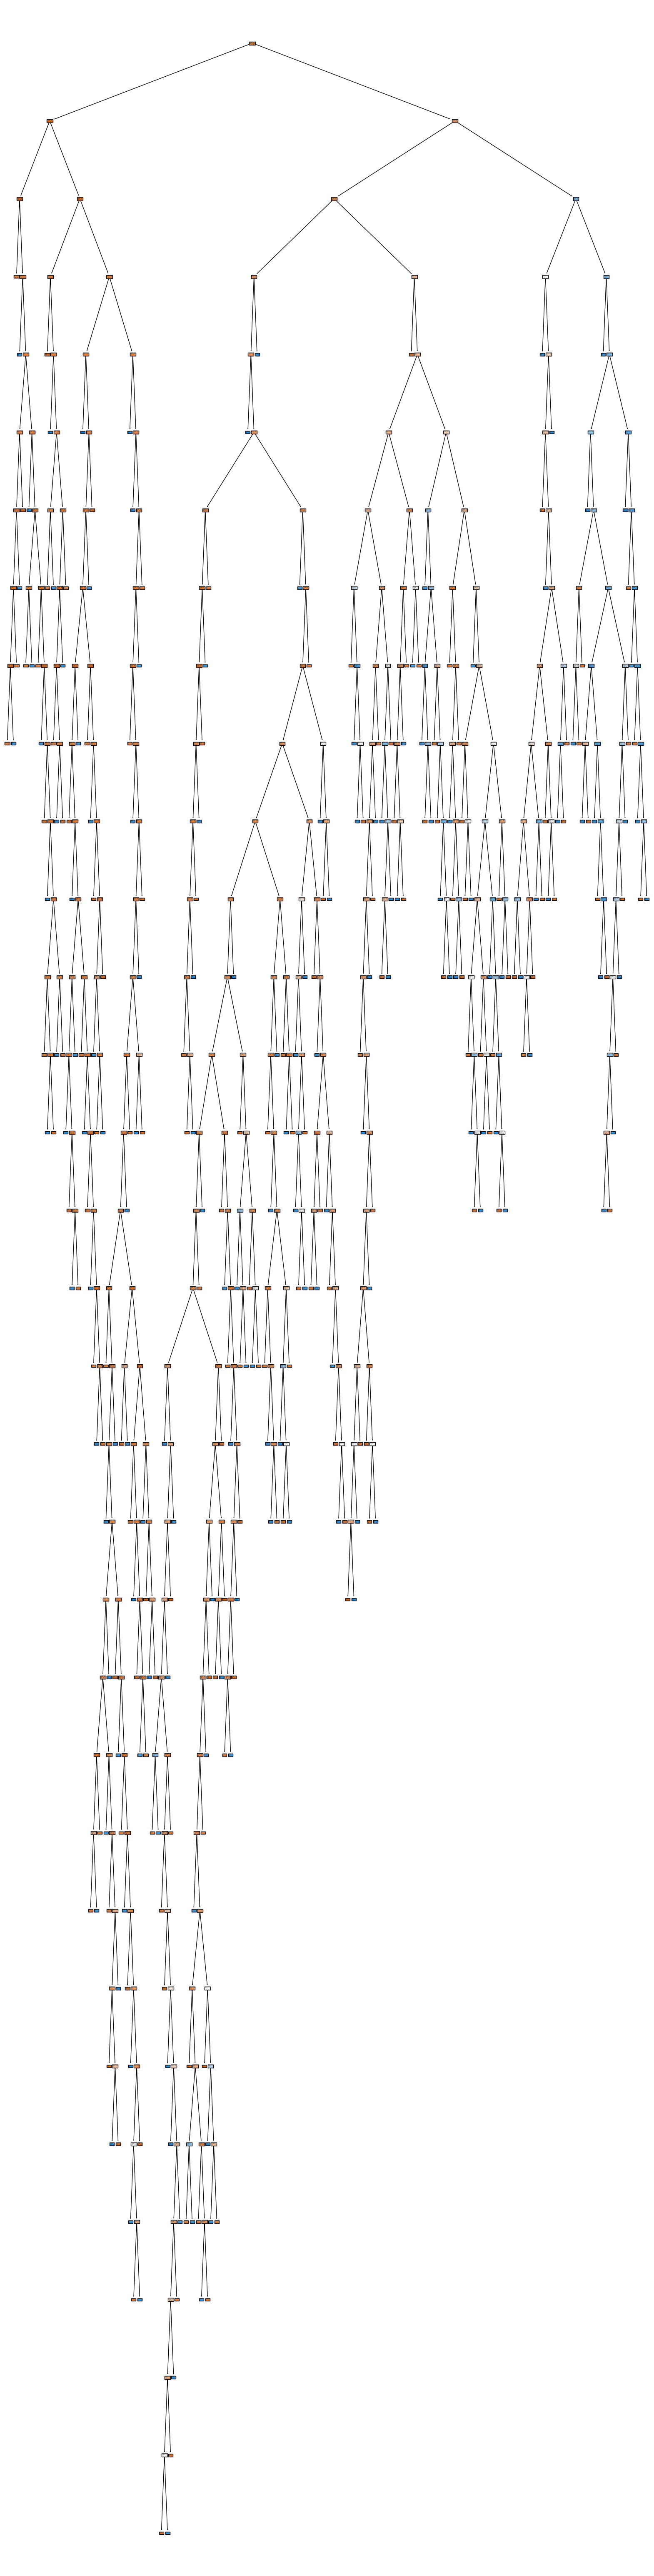

In [33]:
fig = plt.figure(figsize=(20,80))
fig = tree.plot_tree(classifier, feature_names = feature_names, class_names = True, filled=True)
plt.savefig('out.pdf')

### Predicting a new result

In [34]:
print(classifier.predict([[0, 1, 0, 0]])) #student, 0 balance, 0 income

[0]


In [35]:
print(classifier.predict([[0, 1, 1400, 0]])) #student, 1400 balance, 0 income

[1]


In [36]:
print(classifier.predict([[1, 0, 0, 1000]])) #No student, 0 balance, 1000 income

[0]


In [37]:
print(classifier.predict([[1, 0, 1000, 1000]])) #No student, 1000 balance, 1000 income

[1]


### Predicting the Test set results

In [38]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1875   59]
 [  38   28]]


0.9515

## Logistic regression

In [40]:
df = pd.read_csv("Default.csv", index_col= [0])
df

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
...,...,...,...,...
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365


In [41]:
X = df.iloc[:, 1:].values
X

array([['No', 729.526495207286, 44361.6250742669],
       ['Yes', 817.180406555498, 12106.1347003149],
       ['No', 1073.54916401173, 31767.1389473999],
       ...,
       ['No', 845.411989217448, 58636.1569838071],
       ['No', 1569.00905338372, 36669.1123645833],
       ['Yes', 200.922182634797, 16862.9523209407]], dtype=object)

In [42]:
y = df.iloc[:, 0].values
y

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

- Encoding categofical data

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough') #do onehotencode for the column 0 and passthrough for the remainder
X = np.array(ct.fit_transform(X)) #Fit the ColumnTransformer and then make a numpy array

- Encoding the dependent variable

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #create LabelEncoder
y = le.fit_transform(y) #fit the LabelEncoder and then transform

- Splitting the dataset into the training set and test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

- Feature scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 2:] = sc.fit_transform(X_train[:, 2:]) #train x and fit the model using transform 
X_test[:, 2:] = sc.transform(X_test[:, 2:] ) 

### Training the Logistic Regression model on the Training set

In [47]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0).fit(X_train, y_train)

In [48]:
classifier

LogisticRegression(random_state=0)

### Predicting a new result

In [49]:
print(classifier.predict([[0, 1, 0, 0]])) #student, 0 balance, 0 income

[0]


In [50]:
print(classifier.predict([[0, 1, 1400, 0]])) #student, 1400 balance, 0 income

[1]


In [51]:
print(classifier.predict([[1, 0, 0, 1000]])) #No student, 0 balance, 1000 income

[1]


In [52]:
print(classifier.predict([[1, 0, 1000, 1000]])) #No student, 1000 balance, 1000 income

[1]


### Predicting the Test set results

In [53]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1924   10]
 [  44   22]]


0.973

In [55]:
print(classifier.coef_)
print(classifier.intercept_)
#No student, Student, Balance, Income - 6.17, where y = 0 is no-Default, y = 1 is Default
#Balance is the single biggest predictor in Default(=1)

[[ 0.25 -0.25  2.72  0.09]]
[-6.17]


# Deploy

## Save the trained model

In [56]:
import joblib

In [57]:
joblib.dump(classifier, 'my_model_LogisticRegression.pkl') 

['my_model_LogisticRegression.pkl']

## Load the model from the file

In [58]:
LR_from_joblib = joblib.load('my_model_LogisticRegression.pkl') 

In [59]:
LR_from_joblib

LogisticRegression(random_state=0)

In [60]:
X_test

array([[1.0, 0.0, 1.3666195694494714, 0.6572419183600846],
       [1.0, 0.0, 1.109326361840089, 0.49352917640696137],
       [0.0, 1.0, 1.6617636567940919, -1.2607968533497331],
       ...,
       [0.0, 1.0, 0.07726619795413965, -1.5317798809757923],
       [1.0, 0.0, 0.19520319808138883, 1.680095293322105],
       [1.0, 0.0, -0.9976762125690848, -0.23942543999648236]],
      dtype=object)

## Use the loaded model to make predictions 

In [61]:
print("After save:", LR_from_joblib.predict(X_test))

After save: [0 0 0 ... 0 0 0]


# Plot

In [62]:
df

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
...,...,...,...,...
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365


In [63]:
import warnings
warnings.filterwarnings('ignore')

## FacetGrid

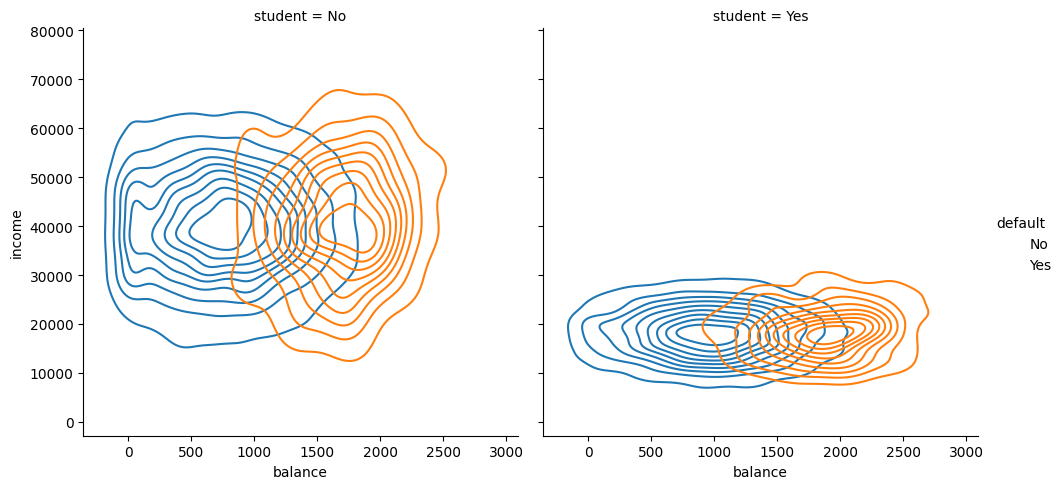

In [64]:
g = sns.FacetGrid(df, col="student", hue = 'default', height= 5)
g.map(sns.kdeplot, "balance", "income")
g.add_legend()
plt.show()

- The thing is the amount of balance, not the status of being a student. 

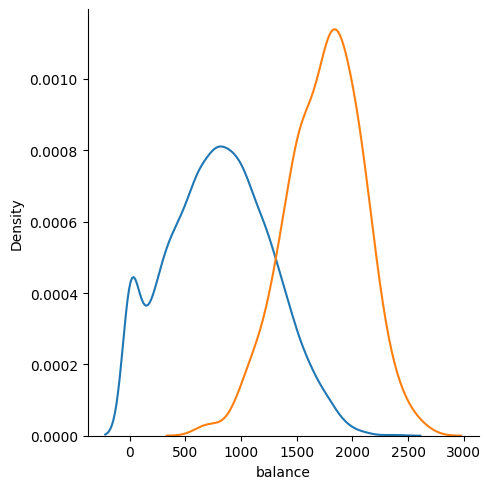

In [65]:
g = sns.FacetGrid(df, hue = "default", height= 5)
g.map(sns.kdeplot, "balance")
plt.show()

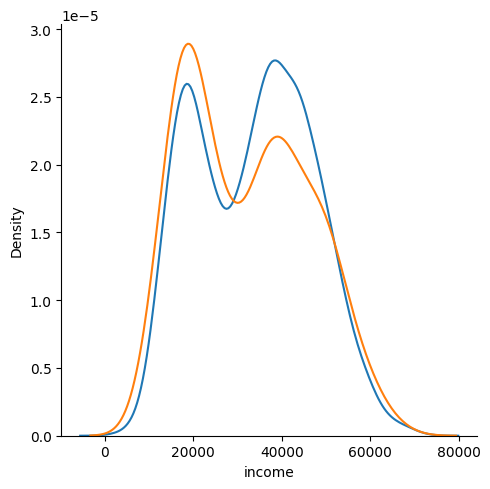

In [66]:
g = sns.FacetGrid(df, hue = "default", height= 5)
g.map(sns.kdeplot, "income")
plt.show()

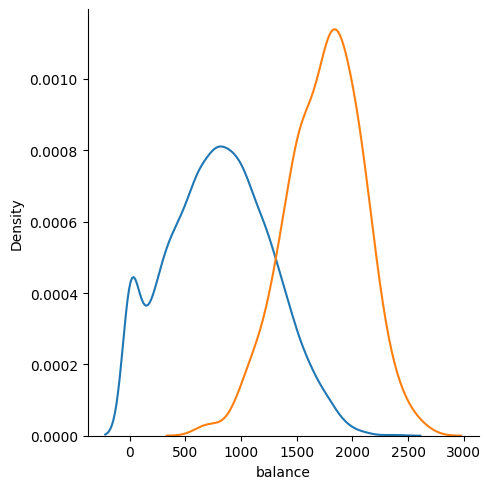

In [67]:
g1 = sns.FacetGrid(df, hue = "default", height= 5)
g1.map(sns.kdeplot, "balance")
plt.show()

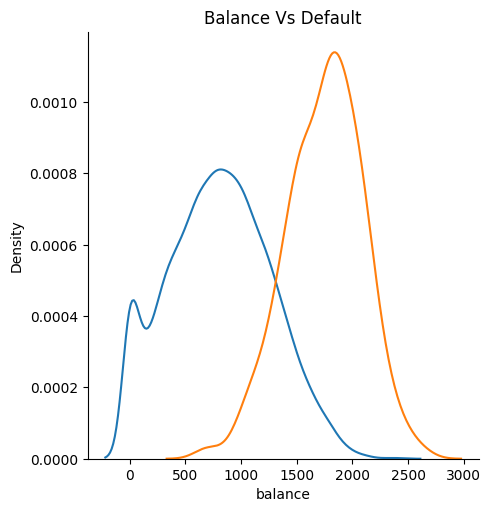

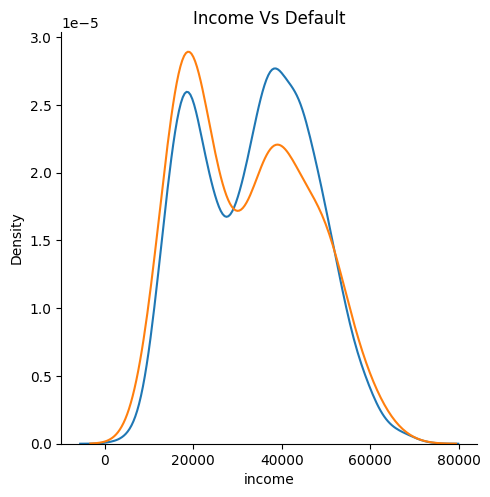

In [68]:
g1 = sns.FacetGrid(df, hue = "default", height= 5)
g1.map(sns.kdeplot, "balance")
plt.title('Balance Vs Default')
g2 = sns.FacetGrid(df, hue = "default", height= 5)
g2.map(sns.kdeplot, "income")
plt.title('Income Vs Default')
plt.show()

In [69]:
#in one big picture
import matplotlib.image as mpimg

In [70]:
g1.savefig('g1.png')
plt.close(g1.fig)
g2.savefig('g2.png')
plt.close(g2.fig)

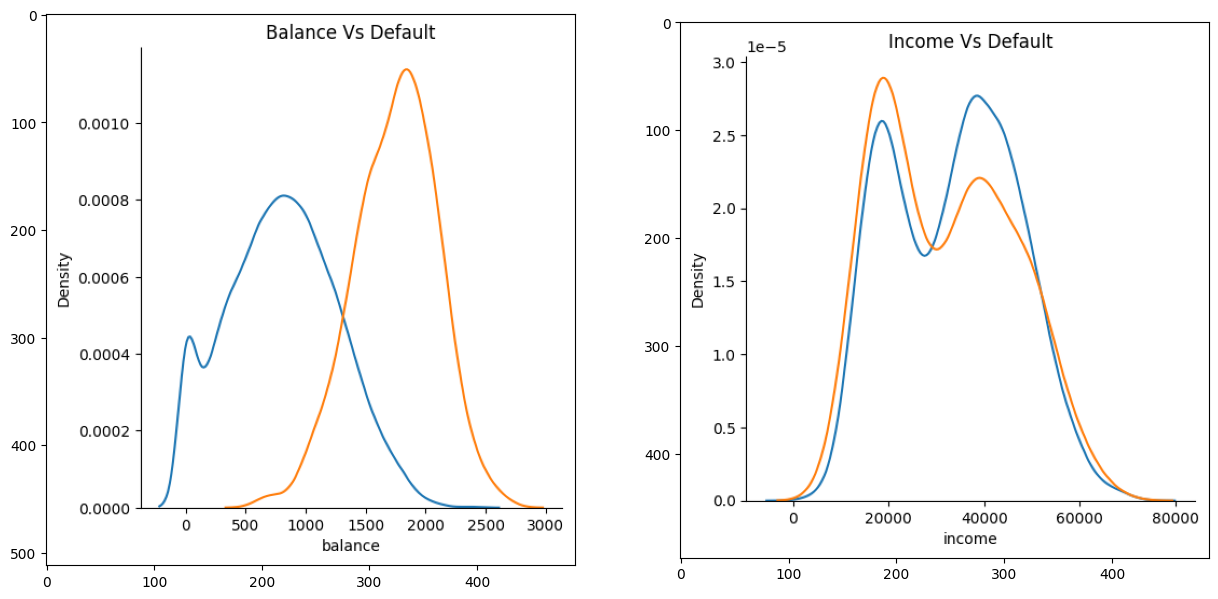

In [71]:
f, axarr = plt.subplots(1, 2, figsize=(15, 20))
axarr[0].imshow(mpimg.imread('g1.png'))
axarr[1].imshow(mpimg.imread('g2.png'))
plt.show()

# Logistic regression (x= balance, y = default)

In [72]:
df = pd.read_csv("Default.csv", index_col= [0])
df

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
...,...,...,...,...
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365


In [73]:
df

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
...,...,...,...,...
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


- df.default = df.default.astype("category")
- df.student = df.student.astype("category")

In [75]:
df.default = df.default.map(dict(Yes=1, No=0))

df.default.replace(to_replace= ["yes", "no"], value = [1, 0], inplace = True)

In [76]:
df

,default,student,balance,income
1,0,No,729.526495,44361.625074
2,0,Yes,817.180407,12106.134700
3,0,No,1073.549164,31767.138947
4,0,No,529.250605,35704.493935
5,0,No,785.655883,38463.495879
...,...,...,...,...
9996,0,No,711.555020,52992.378914
9997,0,No,757.962918,19660.721768
9998,0,No,845.411989,58636.156984
9999,0,No,1569.009053,36669.112365


In [77]:
x = df['balance']
y = df['default']

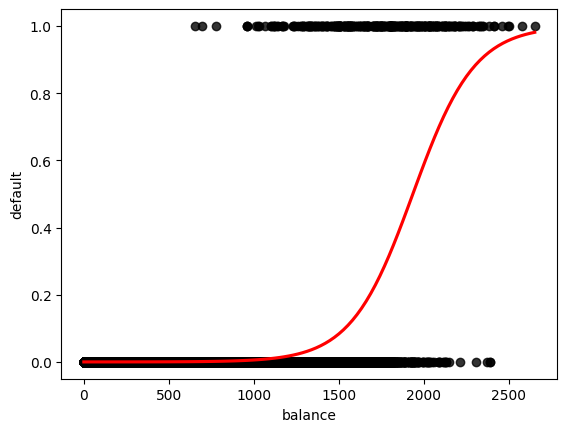

In [79]:
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.show()